# Определение стоимости автомобилей

Сервис по продаже подержанных автомобилей разрабатывает приложение для привлечения новых клиентов. В числе функций предполагается калькулятор рыночной цены автомобиля. В нашем распоряжении исторические данные: технические характеристики, комплектация и цены; на выходе мы должны получить модель для определения стоимости.  

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

**Предоставленные данные:**
- технические характеристики, комплектации и цены автомобилей из базы анкет. 

**Этапы работы:**

1. Обзор и подготовка данных.
2. Обучение моделей, подбор гиперпараметров. Для модели градиентного бустинга техзаданием оговорено использование библиотеки LightGBM.
3. Анализ скорости работы и качества моделей с целевой метрикой RMSE.
4. Общий вывод.

**Цель работы**

Построение модели машинного обучения, способной оценить рыночную стоимость автомобиля исходя из технических характеристик и комплектации.

**Используемые библиотеки:**

- Pandas
- Scikit-learn
- category_encoders
- NumPy
- SciPy
- statsmodels
- LightGBM
- Matplotlib
- Seaborn

<h1>Содержание:<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-и-предобработка-данных" data-toc-modified-id="Обзор-и-предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор и предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Предварительный-вывод" data-toc-modified-id="Предварительный-вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предварительный вывод</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Разброс-цен" data-toc-modified-id="Разброс-цен-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Разброс цен</a></span></li><li><span><a href="#Марка-и-модель-авто" data-toc-modified-id="Марка-и-модель-авто-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Марка и модель авто</a></span></li><li><span><a href="#Датировка" data-toc-modified-id="Датировка-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Датировка</a></span></li><li><span><a href="#Мощность-двигателя" data-toc-modified-id="Мощность-двигателя-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Мощность двигателя</a></span></li><li><span><a href="#Километраж" data-toc-modified-id="Километраж-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Километраж</a></span></li><li><span><a href="#Прочие-характеристики" data-toc-modified-id="Прочие-характеристики-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Прочие характеристики</a></span></li></ul></li><li><span><a href="#Корректировка-выбросов" data-toc-modified-id="Корректировка-выбросов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Корректировка выбросов</a></span></li><li><span><a href="#Финальная-обработка-и-one-hot-encoding" data-toc-modified-id="Финальная-обработка-и-one-hot-encoding-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Финальная обработка и one-hot encoding</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Разбиение-на-выборки-и-feature-selection" data-toc-modified-id="Разбиение-на-выборки-и-feature-selection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разбиение на выборки и feature selection</a></span><ul class="toc-item"><li><span><a href="#Mean-target-encoding" data-toc-modified-id="Mean-target-encoding-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Mean-target encoding</a></span></li><li><span><a href="#Взаимная-информация" data-toc-modified-id="Взаимная-информация-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Взаимная информация</a></span></li><li><span><a href="#Коллинеарность" data-toc-modified-id="Коллинеарность-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Коллинеарность</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ моделей</a></span><ul class="toc-item"><li><span><a href="#Скорость-обучения-моделей-с-оптимальными-гиперпараметрами" data-toc-modified-id="Скорость-обучения-моделей-с-оптимальными-гиперпараметрами-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Скорость обучения моделей с оптимальными гиперпараметрами</a></span></li><li><span><a href="#Метрика-на-тестовой-выборке-и-скорость-инференса" data-toc-modified-id="Метрика-на-тестовой-выборке-и-скорость-инференса-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Метрика на тестовой выборке и скорость инференса</a></span></li><li><span><a href="#Сравнение-с-фиктивными-моделями" data-toc-modified-id="Сравнение-с-фиктивными-моделями-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Сравнение с фиктивными моделями</a></span></li><li><span><a href="#Использование-признаков" data-toc-modified-id="Использование-признаков-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Использование признаков</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span><ul class="toc-item"><li><span><a href="#Рекомендации-по-заполению-данных" data-toc-modified-id="Рекомендации-по-заполению-данных-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Рекомендации по заполению данных</a></span></li></ul></ul></div>

## Обзор и предобработка данных

In [1]:
%pip install category_encoders --user

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Импортируем необходимые модули.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

from sklearn import base
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import mutual_info_regression

from lightgbm import LGBMRegressor

from category_encoders import TargetEncoder

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import spatial

In [3]:
pd.set_option('max_colwidth', 90)

Ознакомимся с первыми строками таблицы и общей информацией:

In [4]:
df = pd.read_csv('/datasets/autos.csv')

In [5]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,354369.0,4416.656776,4514.158514,0.0,1050.0,2700.0,6400.0,20000.0
RegistrationYear,354369.0,2004.234448,90.227958,1000.0,1999.0,2003.0,2008.0,9999.0
Power,354369.0,110.094337,189.850405,0.0,69.0,105.0,143.0,20000.0
Kilometer,354369.0,128211.172535,37905.341530,5000.0,125000.0,150000.0,150000.0,150000.0
RegistrationMonth,354369.0,5.714645,3.726421,0.0,3.0,6.0,9.0,12.0
NumberOfPictures,354369.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
PostalCode,354369.0,50508.689087,25783.096248,1067.0,30165.0,49413.0,71083.0,99998.0


In [8]:
df.isna().mean().sort_values(ascending=False)

NotRepaired          0.200791
VehicleType          0.105794
FuelType             0.092827
Gearbox              0.055967
Model                0.055606
LastSeen             0.000000
PostalCode           0.000000
NumberOfPictures     0.000000
DateCreated          0.000000
Brand                0.000000
RegistrationMonth    0.000000
Kilometer            0.000000
Power                0.000000
RegistrationYear     0.000000
Price                0.000000
DateCrawled          0.000000
dtype: float64

In [9]:
df[df.duplicated(keep=False)].sort_values(by='Model')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
88087,2016-03-08 18:42:48,1799,coupe,1999,auto,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
171088,2016-03-08 18:42:48,1799,coupe,1999,auto,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
187735,2016-04-03 09:01:15,4699,coupe,2003,auto,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54
258109,2016-04-03 09:01:15,4699,coupe,2003,auto,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54
90964,2016-03-28 00:56:10,1000,small,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
231258,2016-03-28 00:56:10,1000,small,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
41529,2016-03-18 18:46:15,1999,wagon,2001,manual,131,passat,150000,7,gasoline,volkswagen,no,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15
325651,2016-03-18 18:46:15,1999,wagon,2001,manual,131,passat,150000,7,gasoline,volkswagen,no,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15


### Предварительный вывод

Предоставлены данные по 16 признакам, в том числе 7 целочисленным числовым, 6 категориальным и 3 типа дата/время (они потребуют приведения типа, хотя для целей исследования данные в этих столбцах не выглядят значимыми). Заголовки колонок удовлетворительны.

Категории `NotRepaired`, `VehicleType`, `FuelType`, `Gearbox` и `Model` имеют значительное количество пропусков (от 5% до 20% от общего количества наблюдений). Также присутствуют нулевые значения в числовых признаках `Price`, `Power`, `RegistrationMonth`, не имеющие физического смысла, и очевидно, тоже свидетельствующие о пропущенных данных. Столбец `NumberOfPictures` содержит только нули - по-видимому, в текущей версии учета он никак не используется.

Кроме того, сразу заметны некорректые значения некоторых числовых признаков (например, 1000 и 9999 годы или 20000 л.с. мощности).

В наличии 4 дублированных строки, учитывая совпадения вплоть до дат, их следует трактовать как повторы и исключить из выборки.

### Анализ данных

In [10]:
translations = {
                    'Price':'Цена, евро',
                    'Power':'Мощность двигателя, л.с.',
                    'RegistrationYear':'Год выпуска',
               }

def visualize(column, xlim=(0)):
    xlabel = translations[column]
    fig, axes = plt.subplots(1, 2, figsize=(16,7))
    
    sns.distplot (df[column], ax=axes[0], bins='auto', kde=False)
    
    axes[0].set (title='Гистограмма', xlabel=xlabel, ylabel='Наблюдений, шт.', xlim=xlim);
    sns.violinplot (data=df, ax=axes[1], x=column)
    axes[1].set (title='Плотность и размах', xlabel=xlabel, xlim=xlim);

#### Разброс цен

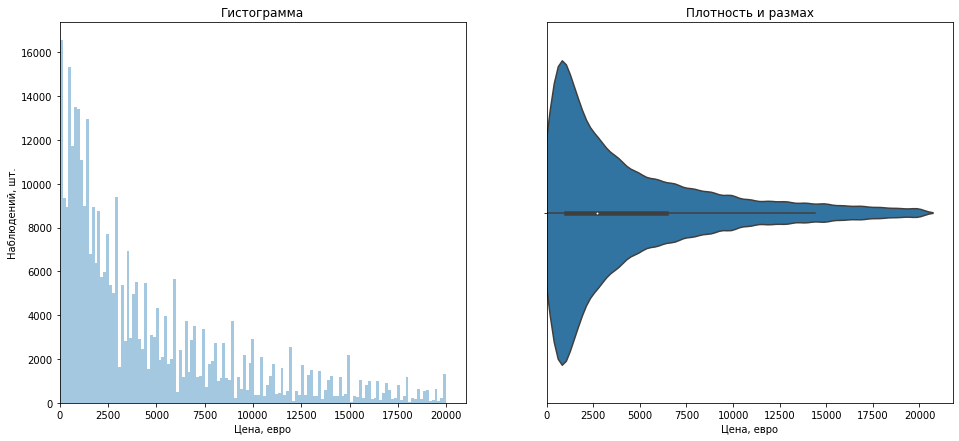

In [11]:
visualize('Price')

Цены в нашем датасете разбросаны от 0 до 20000 евро, основная часть приходится на дешевые предложения: медианное значение всего лишь 2700 евро, а 75% ценников не превосходят 6400. Выбросы в основном приходятся на круглые цифры, что вполне ожидаемо.

Однако у нас много нулевых и околонулевых значений, что ставит серьезную задачу о том, где проводить границу допустимого. С одной стороны, цена в 1 или 10 евро выглядит неправдоподобно, с другой - 100 евро за сильно подержанную машину в некоторых странах - вполне реальная цена, кроме того, в базе могут присутствовать, например, мотороллеры. Наконец, не оговаривается, что машина должна быть на ходу.

In [12]:
df['Price'].quantile([.05, 0.95])

0.05      200.0
0.95    14600.0
Name: Price, dtype: float64

90% значений лежит в диапазоне от 200 до 14600 евро, пока примем это к сведению и обратимся к другим данным.

#### Марка и модель авто

In [13]:
brand_pivot = df.pivot_table(index='Brand', values='Price', aggfunc={'count','mean','median'})
brand_pivot.sort_values(by='mean', ascending=False)

,count,mean,median
Brand,,,
porsche,758.0,10994.670185,11900.0
mini,3202.0,8992.646159,8200.0
land_rover,545.0,8429.365138,7000.0
jeep,677.0,7065.096012,5900.0
jaguar,505.0,6685.538614,4990.0
audi,29456.0,6239.976507,4600.0
bmw,36914.0,6162.214661,4799.0
mercedes_benz,32046.0,5910.507614,4250.0
skoda,5500.0,5909.606727,4800.0


Бренды выглядят корректно (Sonstige Аutos - буквально "прочие автомобили" по-немецки, но для моделирования язык не имеет значения), кроме того, зависимость цены от производителя налицо. Это определенно важные данные.

In [14]:
model_pivot = df.pivot_table(index='Brand', values='Model', aggfunc={'unique'})
model_pivot['unique']

Brand
alfa_romeo                                                         [156, 147, nan, spider, 159, other, 145]
audi                             [nan, a8, a4, a1, tt, a6, 80, 100, a3, a2, a5, other, 90, q7, q3, 200, q5]
bmw                                    [3er, 5er, 1er, 7er, z_reihe, nan, 6er, other, x_reihe, m_reihe, i3]
chevrolet                                                         [other, matiz, nan, spark, captiva, aveo]
chrysler                                           [other, ptcruiser, crossfire, 300c, grand, voyager, nan]
citroen                                                          [c4, berlingo, c1, other, c3, c5, nan, c2]
dacia                                                           [logan, duster, sandero, lodgy, nan, other]
daewoo                                                            [lanos, kalos, matiz, other, nubira, nan]
daihatsu                                        [cuore, sirion, other, charade, move, nan, terios, materia]
fiat                  

Среди моделей около 5,5% пропусков, в остальном они выглядят достаточно корректно. Зависимость стоимости от модели достаточно очевидна: в рамках одного бренда могут выпускаться как люксовые, так и бюджетные автомобили, кроме того, есть модели старые и новые:

In [15]:
df.pivot_table(index=['Brand','Model'], values='Price', aggfunc={'mean','median'}).query('Brand == "fiat"')

mean  median
Brand Model                        
fiat  500       7702.017391  7500.0
      bravo     2661.419940  1550.0
      croma     3980.266667  3500.0
      doblo     3578.129231  2900.0
      ducato    3850.754023  2999.0
      other     2851.624371  1899.0
      panda     3102.130178  2950.0
      punto     1637.711383  1000.0
      seicento   814.094030   750.0
      stilo     1600.917081  1500.0

Подготовим функцию для обработки пропусков в столбце: у нас уже есть значение *other*, так что воспользуемся им.

In [16]:
def fill_with_other(df, columns):
    df[columns] = df[columns].fillna('other')
    return df

#### Датировка

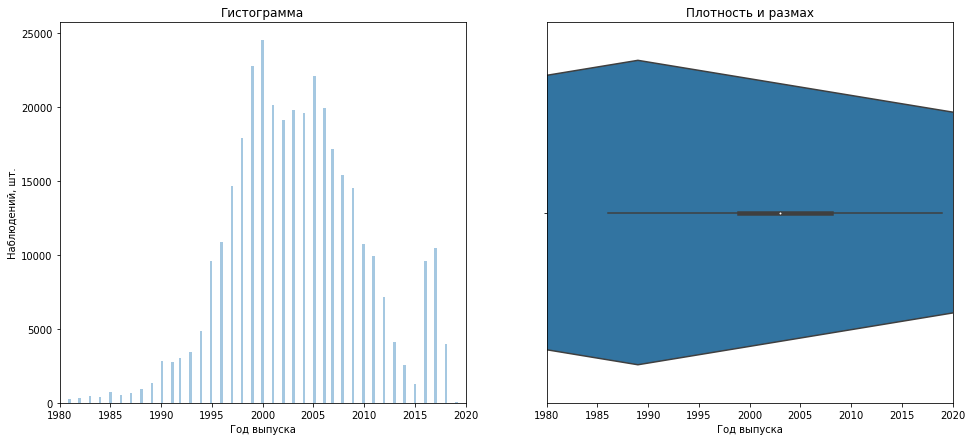

In [17]:
visualize('RegistrationYear', xlim=(1980, 2020))

Диграмма размаха простирается с 1986 по 2019 год, пик предложений приходится на 2000 и 2005 годы.

Отметим ненормальный всплеск на 2016-2019 годах - при этом датасет сформирован в начале 2016 года:

In [18]:
pd.to_datetime(df['DateCrawled']).max()

Timestamp('2016-04-07 14:36:58')

В то же время средняя цена в этом периоде сильно ниже, чем за предшествующие годы. Подобных событий на реальном рынке не наблюдалось. Можно с уверенностью заключить, что перед нами ошибка в данных. Возможно, некоторые цифры месяца попали в год, но почему именно такие - не вполне ясно.

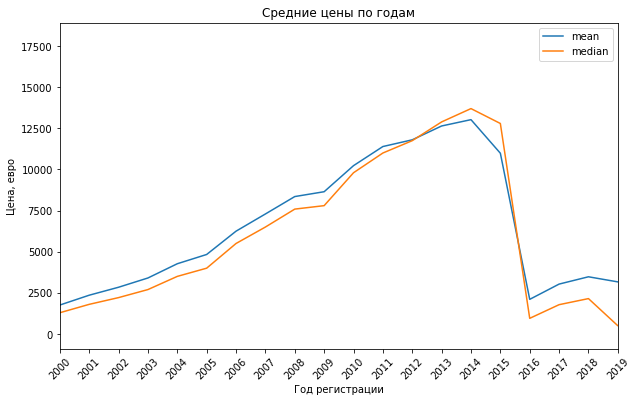

In [19]:
year_pivot = df.pivot_table(index='RegistrationYear', values='Price', aggfunc={'mean','median'})
year_pivot.plot(kind='line', rot=45, figsize=(10,6)).set(xlim=(2000,2019), xlabel='Год регистрации',
                                                         ylabel='Цена, евро', xticks=range(2000, 2020),
                                                         title='Средние цены по годам');

На аномальный период приходится около 7% наблюдений.

In [20]:
len(df.query('RegistrationYear > 2015')) / len(df)

0.06809004173615638

Посмотрим теперь на месяцы:

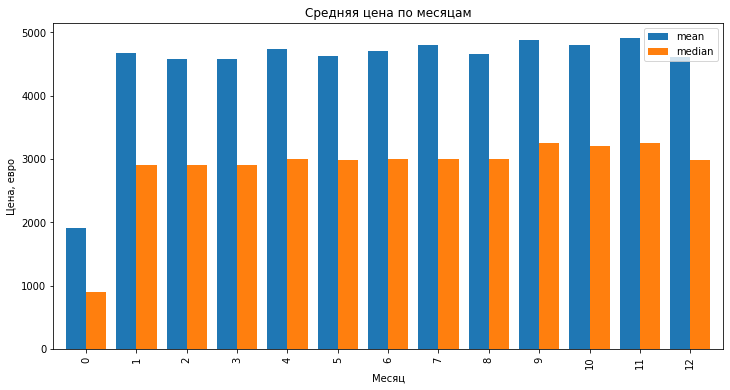

In [21]:
month_pivot=df.pivot_table(index='RegistrationMonth', values='Price', aggfunc={'mean','median'})
month_pivot.reset_index().plot(kind='bar', x='RegistrationMonth', figsize=(12,6), width=0.8).set(title='Средняя цена по месяцам', xlabel='Месяц', ylabel='Цена, евро');

Записи, отмеченные нулевым месяцем, характеризуются аномально низкой средней ценой - меньше половины от нормы. Распределение по другим месяцам достаточно равномерное, с разбросом в несколько процентов. С точки зрения здравого смысла, месяц регистрации ТС не должен иметь сколько-нибудь серьезного влияния на его цену. Нулевое значение, возможно, имеет какой-то особый смысл, для нас утерянный. С точки зрения поставленной задачи, на вход калькулятора скорее всего будут подаваться корректные данные, и сохранять нулевой месяц не имеет смысла. Таких строк, однако, более 10%:

In [22]:
len(df.query('RegistrationMonth ==0')) / len(df)

0.10540425375808832

Сохраним эти условия для отсеивания подозрительных данных, кроме того, не будем рассматривать модели до 1930 года:

In [23]:
sane_dates =(df['RegistrationYear'] > 1930) & (df['RegistrationYear'] < 2016) & (df['RegistrationMonth'] != 0)

#### Мощность двигателя

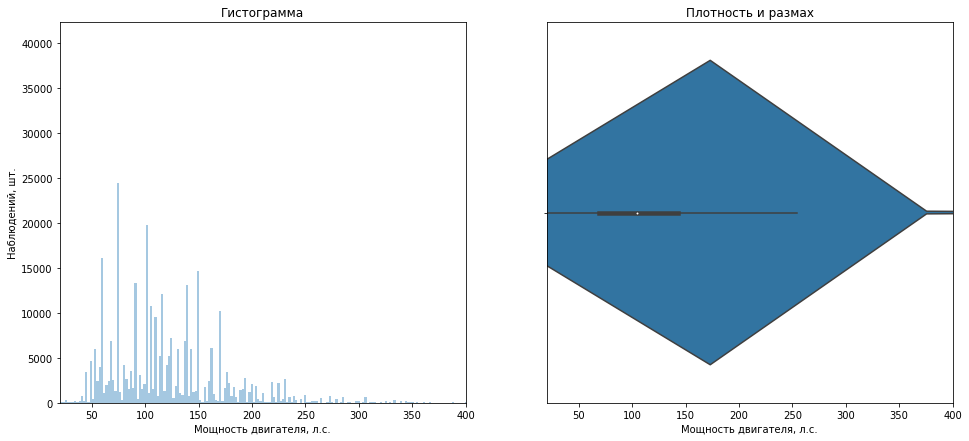

In [24]:
visualize('Power', xlim=(20,400))

Визуализация не слишком информативная: распределение чересчур неравномерно. Тем не менее, диаграмма размаха покрывает диапазон от 0 до 250 л.с., хотя нулевая мощность, понятно, не имеет смысла, а машины в 300 и более л.с. не так уж и редки в наши дни. Разумная нижняя граница опять же достаточно размыта - фиат500 в свое время имел двигатель  всего в 13 л.с., бывают и мотоколяски с мощностью еще ниже.

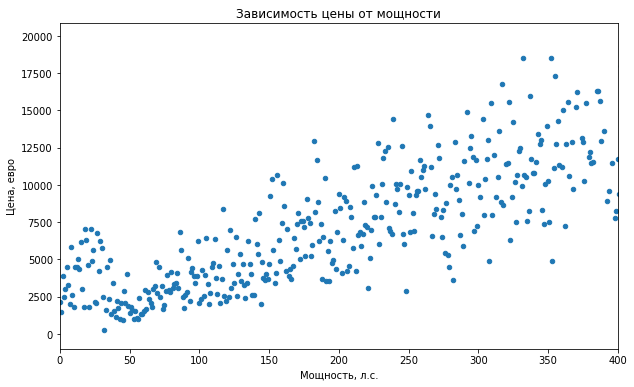

In [25]:
power_pivot = df.pivot_table(index='Power', values='Price', aggfunc='mean')
power_pivot.reset_index().plot(kind='scatter', x='Power', y='Price', xlim=(0,400), figsize=(10,6)).set(title='Зависимость средней цены от мощности', xlabel='Мощность, л.с.', ylabel='Цена, евро');

В значимом промежутке, как и следовало ожидать, прослеживается достаточно линейная зависимость усредненной цены автомобиля от мощности мотора. Это однозначно важный признак.

In [26]:
len(df.query('Power == 0')) / len(df)

0.11351162206626426

В столбце `Power` порядка 11% нулевых значений. Заполнение пропусков в признаке, к сожалению, не представляется возможным: даже при совпадении модели, кузова и года значения могут довольно сильно отличаться, что ставит о вопрос о качестве даже заполненных данных:

In [27]:
df.groupby(['Brand', 'Model', 'VehicleType', 'RegistrationYear'])['Power'].agg(min='min', max='max', mode=lambda x: pd.Series.mode(x)[0])

min  max  mode
Brand      Model    VehicleType RegistrationYear                
alfa_romeo 145      coupe       1999                0  103     0
                    other       1995              100  100   100
                    sedan       1995               90   90    90
                                1997              140  140   140
                                1998              119  227   119
...                                               ...  ...   ...
volvo      xc_reihe wagon       2007              185  185   185
                                2008              185  185   185
                                2009              185  205   185
                                2010              163  163   163
                                2011              163  163   163

[13526 rows x 3 columns]

Корректировка всех данных по сути требует пересборки датасета и в данном случае нецелесообразна. В то же время с позиции поставленной задачи (калькулятор цены автомобиля требует лишь разумной оценки, а не идеальной точности) удаление нулевых строк выглядит приемлемым решением. Запишем это условие:

In [28]:
sane_power =(df['Power'] > 0)

#### Километраж

In [29]:
df['Kilometer'].value_counts(dropna=False)

150000    238209
125000     36454
100000     14882
90000      11567
80000      10047
70000       8593
60000       7444
5000        6397
50000       6232
40000       4911
30000       4436
20000       3975
10000       1222
Name: Kilometer, dtype: int64

Все значения пробега округлены, причем подавляющее большинство приходится на 150 тыс. км (видимо, подразумевается "и более").

In [30]:
df.query('Price>0').pivot_table(index='Kilometer', values='Price', aggfunc={'mean','median'})

,mean,median
Kilometer,,
5000,3252.405436,1250.0
10000,9878.122164,9999.0
20000,8816.631222,8500.0
30000,9477.222761,8992.5
40000,9768.012974,9100.0
50000,9247.385666,8400.0
60000,8649.567648,7800.0
70000,8015.902979,6999.0
80000,7345.423737,6300.0


В целом средняя цена с ростом пробега, как и ожидается, падает. Аномально выглядит лишь категория с пробегом 5000 км (соответственно, видимо, "и менее") - она оказывается самой "дешевой". Это не обязательно ошибка - если на старом автомобиле не ездили, возможно, он неликвиден по тем или иным причинам. Без консультации специалиста разумнее пока сохранить эти значения.

#### Прочие характеристики

In [31]:
df['Gearbox'].value_counts(dropna=False)

manual    268251
auto       66285
NaN        19833
Name: Gearbox, dtype: int64

В ряде случаев не указан тип коробки передач. Представляется вполне разумным заполнить пропуски наиболее частым значением (ручная коробка).

In [32]:
df['NotRepaired'].value_counts(dropna=False)

no     247161
NaN     71154
yes     36054
Name: NotRepaired, dtype: int64

Большое количество пропусков в столбце `NotRepaired` ставит вопрос о трактовке признака:

In [33]:
df.pivot_table(index='NotRepaired', values='Price', aggfunc={'mean', 'median'})

,mean,median
NotRepaired,,
no,5296.811135,3690.0
yes,1916.039080,900.0


Судя по распределению средних цен, признак следует понимать как то, что машина нуждается в ремонте - позиции со значением *yes* сильно дешевле. Заполнять пропуски более логично будет значением *no* - как правило, если машина не в исправности, это указывают явно.

In [34]:
df['FuelType'].value_counts(dropna=False)

petrol      216352
gasoline     98720
NaN          32895
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64

Отметим, что *petrol* и *gasoline* в данном контексте - это одно и то же (бензиновый мотор). Подготовим функцию замены:

In [35]:
def fix_fuel_types(df):
    df['FuelType'] = df['FuelType'].replace('gasoline', 'petrol')
    return df

Остальные значения выглядят корректно, *lpg* и *cng* символизуют сжиженный газ и биогаз соответственно. Пропуски также представляется разумным заполнить модой (*petrol*).

### Корректировка выбросов

In [36]:
df_filtered = df[sane_dates & sane_power]

Попробуем выделить границы выбросов для цены и мощности с помощью расстояния Махалонобиса (обобщение евклидова расстояния через матрицу ковариации). Это позволит учесть формы распределений этих двух параметров и их взаимозависимость, что должно дать несколько лучший результат, чем отсеивание по отдельным значениям признаков:

In [37]:
outlier_space = ['Power','Price']

# Вычислим матрицу ковариации:
covariance = np.cov(df_filtered[outlier_space], rowvar=False)
covariance_pm1 = np.linalg.matrix_power(covariance, -1)
# Найдем центр распределения:
center = np.mean(df_filtered[outlier_space], axis=0)

In [38]:
def calc_distance(row):
    return spatial.distance.mahalanobis(row, center, covariance_pm1)

In [39]:
# Вычислим расстояния для каждого наблюдения:
distance = df_filtered[outlier_space].apply(calc_distance, axis=1)

Мы сохраним 80% наблюдений, это позволит задать нижнюю границу цены. Нашей целевой метрикой является RMSE, которая ввиду большого правого "хвоста" в распределении цен будет очевидным образом зависеть от заданной верхней границы цены. Чем больше высоких значений мы отсеем, тем ниже будет среднеквадратичная ошибка - скорее всего, ценой несколько большей относительной ошибки. С точки зрения задачи построения ценового калькулятора подбор оптимальной верхней границы - скорее совместная работа с разработчиками конечного приложения и отделом продаж. Здесь можно изменить этот параметр.

In [40]:
limit = distance.quantile(0.8)

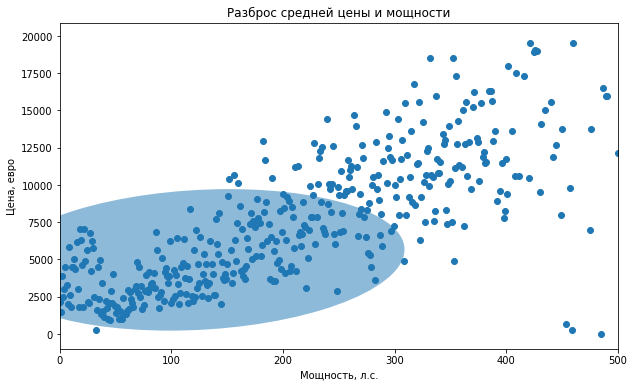

In [41]:
# Обрисуем границы выбросов
pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)
ellipse = patches.Ellipse(xy=(center[0], center[1]),
                  width=lambda_[0]*np.sqrt(limit)*2, height=lambda_[1]*np.sqrt(distance.quantile(0.8))*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])))
ellipse.set_alpha(0.5)
fig = plt.figure(figsize=(10,6))
ax = plt.subplot()
plt.scatter(power_pivot.reset_index()['Power'], power_pivot.reset_index()['Price']);
ax.add_artist(ellipse)
ax.set(xlim=(0,500),title='Разброс средней цены и мощности', xlabel='Мощность, л.с.', ylabel='Цена, евро');

In [42]:
df_filtered = df_filtered[distance < distance.quantile(0.8)]
df_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,222564.0,3374.502673,2486.272210,142.0,1299.0,2699.0,4999.0,9800.0
RegistrationYear,222564.0,2001.801760,5.553520,1931.0,1999.0,2002.0,2006.0,2015.0
Power,222564.0,111.175186,43.223751,1.0,75.0,105.0,140.0,310.0
Kilometer,222564.0,132871.263996,32360.006232,5000.0,125000.0,150000.0,150000.0,150000.0
RegistrationMonth,222564.0,6.376997,3.348703,1.0,3.0,6.0,9.0,12.0
NumberOfPictures,222564.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
PostalCode,222564.0,50939.145531,25653.946970,1067.0,30851.0,49828.0,71332.0,99998.0


При таких условиях значимая граница цен составит от 142 до 9800 евро, а верхняя граница мощности мотора - 310 л.с.

### Финальная обработка и one-hot encoding

Подытожим нашу предобработку: нам понадобится исправить значения в столбце `FuelType` и заполнить пропуски в столбцах `FuelType`, `Gearbox` и `NotRepaired` по наиболее частым значениям. Аналогично поступим со столбцом `VehicleType`, но с учетом группировки по маркам автомобилей.

От столбца `NumberOfPictures` мы избавимся, так как он не используется, аналогично поступим с признаками `DateCrawled`, `DateCreated` и `LastSeen` - они по большей части не связаны с ценой и их точно не будет на входе конечного приложения-калькулятора.

Кроме того, нам предстоит закодировать категориальные признаки. Для `Gearbox` и `NotRepaired` разумно использовать one-hot кодирование, так как они по сути бинарны. А вот, к примеру, для марки авто это привело бы к появлению нескольких сотен новых столбцов, что неприемлемо с точки зрения ресурсоемкости модели.

Оптимальным представляется использовать для `Brand`, `Model`, `FuelType` и `VehicleType` mean-target кодирование (кодирование нормализованным средним значением целевого признака). Его же можно применить для `PostalCode` (хотя этот признак формально числовой, он не коррелирует с ценой напрямую, но при этом может быть информативен, т.к. указывает на регион). Но этот этап мы проведем уже после выделения тестовой выборки - во избежание утечки данных.

In [43]:
one_hot_encoded_columns = ['Gearbox', 'NotRepaired']
unused_columns = ['DateCrawled', 'DateCreated', 'NumberOfPictures', 'LastSeen'] + one_hot_encoded_columns

In [44]:
# Функция заполнения пропусков модой столбца:
def fill_with_mode(df, columns):
    for column in columns:
        df[column] = df[column].fillna(df[column].mode()[0])
    return df

In [45]:
# Функция заполнения пропусков модой столбца, но с учетом группировки по модели авто:
def fill_with_mode_by_groups(df, columns):
    for column in columns:
        df[column] = df[column].fillna(df.groupby(['Brand','Model'])[column].transform(lambda x: pd.Series.mode(x)[0]))
    return df

In [46]:
# Функция one-hot кодирования:
def one_hot_encoding(df, columns):
    dummies = pd.get_dummies(df[columns], drop_first=True)
    df[dummies.columns] = dummies
    return df

In [47]:
def drop_unused_columns (df, column_list):
    return df.drop (column_list, axis=1)

In [48]:
df_filtered = (
    df_filtered
    .drop_duplicates().reset_index(drop=True)
    .pipe(fix_fuel_types)
    .pipe(fill_with_other, ['Model'])
    .pipe(fill_with_mode, ['FuelType','Gearbox', 'NotRepaired'])
    .pipe(fill_with_mode_by_groups, ['VehicleType'])
    .pipe(one_hot_encoding, one_hot_encoded_columns)
    .pipe(drop_unused_columns, unused_columns)
)

In [49]:
df_filtered.isna().sum()

Price                0
VehicleType          0
RegistrationYear     0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
PostalCode           0
Gearbox_manual       0
NotRepaired_yes      0
dtype: int64

In [50]:
df_filtered.head()

,Price,VehicleType,RegistrationYear,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,PostalCode,Gearbox_manual,NotRepaired_yes
0,1500,small,2001,75,golf,150000,6,petrol,volkswagen,91074,1,0
1,3600,small,2008,69,fabia,90000,7,petrol,skoda,60437,1,0
2,650,sedan,1995,102,3er,150000,10,petrol,bmw,33775,1,1
3,2200,convertible,2004,109,2_reihe,150000,8,petrol,peugeot,67112,1,0
4,2000,sedan,2004,105,3_reihe,150000,12,petrol,mazda,96224,1,0


### Вывод

По итогам анализа и предобработки:

- Разброс **цен** в исходном датасете составляет 0 до 20000 евро, медианное значение 2700 евро. Мы ограничили цены диапазоном 142 - 9800 евро, этот параметр в идеале подлежит дальнейшему согласованию с заказчиком.
- Пик предложений приходится на машины 2000 и 2005 годов. Значимый **период регистрации** транспортного средства согласно диаграмме размаха приходится на 1986-2019 годы. Однако период 2016-2019 противоречит техническим временным отметкам в данных и сильно не соответствует ценовой динамике предыдущих лет, поэтому мы исключили данные за этот период из выборки (как и последующие явно некорректные значения). За минимальную дату был принят 1931 год. Признак месяца регистрации содержит аномальные значения 0, сильно отличающиеся от остальных месяцев по цене. Эти строки были удалены.
- Значения **мощности двигателя** разбросаны очень сильно и содержат большое количество нулевых значений. Ввиду различия значений даже в пределах одной модели нам пришлось удалить нулевые строки. Допустимый диапазон значений мы ограничили 1-310 л.с.
- Цена достаточно явно зависит от значений мощности, а также обратно пропорциональна **пробегу**, за исключением машин с наименьшим пробегом. Причина последнего не вполне ясна, но может иметь реальные основания, поэтому эти данные были сохранены.
- Пропуски в значениях **модели**, **типа трансмиссии** и **двигателя** были заполнены модами, а для **типа кузова** - модами по группам.
- К столбцам `Gearbox` и `NotRepaired` мы применили one-hot encoding, а столбцы `DateCrawled`, `DateCreated`, `NumberOfPictures`, `LastSeen` удалили как неинформативные с точки зрения поставленной задачи.

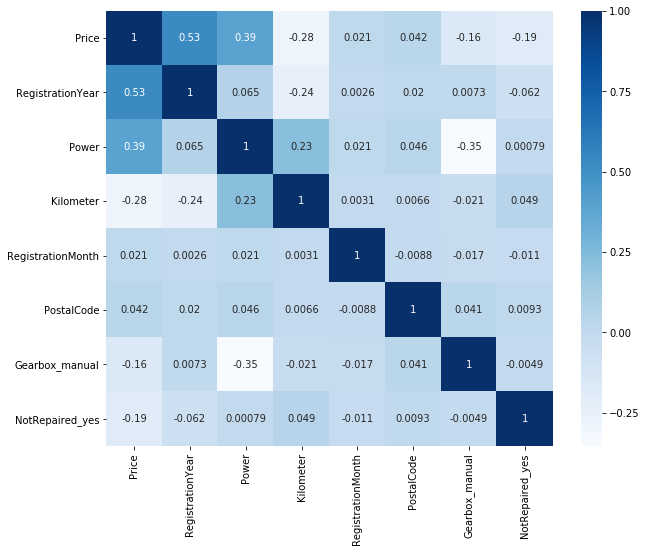

In [51]:
plt.figure (figsize=(10,8))
sns.heatmap (df_filtered.corr(), annot=True, cmap='Blues');

Напоследок посмотрим на корреляции в отфильтрованном датасете:

- Цена ожидаемо зависит от года и мощности двигателя и обратно пропорциональна пробегу. Ручная коробка передач и наличие повреждений как будто бы снижают цену, но эти признаки по сути бинарны, поэтому мы не можем говорить о реальной корреляции. Статистических тестов в данном случае делать не будем, поскольку ниже проведем проверку взаимной информации.

- Год обратно пропорционален пробегу. Также ожидаемо.

- Пробег зависит от мощности. Тоже вполне объяснимо, мощный двигатель пройдет больше за то же время.

- Наконец, на мощные машины как будто бы предпочитают ставить автоматическую трансмиссию, но это находится за пределами темы нашего исследования.

## Разбиение на выборки и feature selection

In [52]:
# Зафиксируем состояние генератора случайных чисел для воспроизведения результатов:
random_state=177013

Выделим обучающую и тестовую выборки в размере 80% и 20% от отфильтрованного датасета:

In [53]:
df_features = df_filtered.drop(['Price'], axis=1)
df_target = df_filtered['Price']

In [54]:
features_train, features_test, target_train, target_test = train_test_split(df_features, df_target, test_size=0.2, random_state=random_state)

### Mean-target encoding

Воспользуемся *TargetEncoder* из библиотеки сategory_encoders:

In [55]:
target_encoded_columns = ['Brand', 'Model', 'VehicleType', 'FuelType', 'PostalCode']

In [56]:
for column in target_encoded_columns:
    encoder = TargetEncoder()
    encoder.fit(features_train[column], target_train)
    features_train[column] = encoder.transform(features_train[column])
    features_test[column] = encoder.transform(features_test[column])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [57]:
features_train.head()

,VehicleType,RegistrationYear,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,PostalCode,Gearbox_manual,NotRepaired_yes
175995,3384.772270,2004,116,2857.859675,150000,9,3372.373432,2701.035763,89269,1,0
174293,4095.224368,1991,75,3639.588235,150000,7,3372.373432,2715.520420,84069,1,0
213232,3384.772270,2004,177,4247.573650,150000,7,3372.373432,4244.387478,37696,1,0
120221,3384.772270,2007,140,3241.212860,150000,7,3372.373432,3401.860724,82140,1,0
185250,2584.029886,2002,73,3751.595679,80000,12,3372.373432,3182.041939,49074,1,0


### Взаимная информация

Все ли оставшиеся признаки значимы? Это можно оценить с помощью меры взаимной информации:

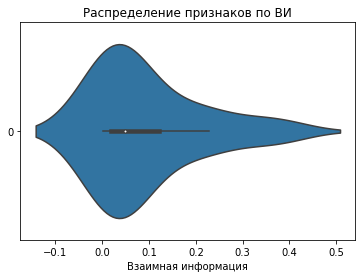

In [58]:
# Полностью загрузить выборку здесь, к сожалению, не выходит, поскольку умирает ядро.
# Результат верифицирован локально на полной выборке и соответствует.
mi_scores = mutual_info_regression(features_train.sample(frac=0.25, random_state=random_state), target_train.sample(frac=0.25, random_state=random_state))
sns.violinplot(data=mi_scores, orient='h').set(title='Распределение признаков по ВИ', xlabel='Взаимная информация');

In [59]:
pd.Series(mi_scores).describe()

count    11.000000
mean      0.093964
std       0.115372
min       0.000750
25%       0.018468
50%       0.049234
75%       0.121466
max       0.365166
dtype: float64

In [60]:
mi_score_selected_index = np.where(mi_scores > 0.02)[0]
recommended_columns = features_train.iloc[:, mi_score_selected_index].columns
not_recommended = sorted(list(set(features_train.columns).difference(set(recommended_columns))))
not_recommended

['FuelType', 'Gearbox_manual', 'RegistrationMonth']

Признак `RegistrationMonth`, как и ожидалось, влияет на цену слабо, кроме того, несущественными оказываются `FuelType` и `Gearbox`. Исключим эти три столбца из выборок:

In [61]:
features_train = features_train.drop(not_recommended, axis=1)
features_test = features_test.drop(not_recommended, axis=1)

### Коллинеарность

Посмотрим, нет ли у нас избыточных признаков. Для оценки будем использовать матрицу коррелляции и Variance Inflation Factor.

In [62]:
vif_data = pd.DataFrame()
vif_data['feature'] = features_train.columns
vif_data['VIF'] = [variance_inflation_factor(features_train.values, i) for i in range(len(features_train.columns))]
  
vif_data.sort_values(by='VIF', ascending=False)

,feature,VIF
1,RegistrationYear,66.386182
0,VehicleType,42.537844
5,Brand,39.196517
4,Kilometer,19.066611
3,Model,16.043646
2,Power,11.290113
6,PostalCode,4.953420
7,NotRepaired_yes,1.117066


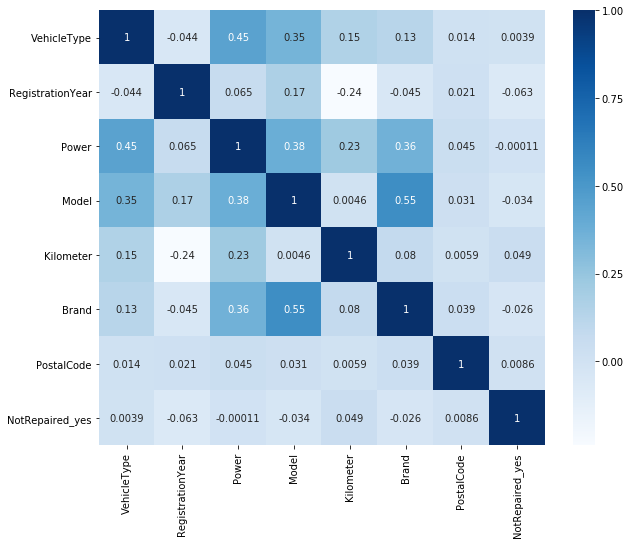

In [63]:
plt.figure (figsize=(10,8))
sns.heatmap (features_train.corr(), annot=True, cmap='Blues');

Кодированные переменные не вызвали сильной коллинеарности (все корреляции ожидаемы), однако VIF некоторых важных признаков высок - до 66 единиц. Точность модели будет не слишком хорошей, но ничего катастрофического.

## Обучение моделей

In [64]:
# Функция оптимизации модели. Принимает на вход модель, диапазон гиперпараметров для GridSearchCV и обучающую выборку.
# Возвращает модель с оптимальными гиперпараметрами.
def optimize(model, params, X, y):
    name = f'{type(model).__name__}'
    print(f'Оптимизация {name}...')
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    gcv = GridSearchCV (estimator=model, param_grid=params, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)
    gcv.fit (X_scaled, y)
    print(f'Лучшие параметры: {gcv.best_params_}')
    print(f'RMSE: {(-gcv.best_score_) ** 0.5:.1f}')
    return gcv.best_estimator_

Помимо оговоренного в техзадании градиентного бустинга через LightGBM, воспользуемcя классическим набором моделей: линейной регрессией, деревом решений и случайным лесом. (Также были протестированы несколько других регрессоров, в том числе SGD, опорные вектора и метод ближайших соседей, но они показали себя неконкурентосособными по скорости и точности предсказания, и для краткости мы не включили сюда откровенно неудачные модели).

In [65]:
%%time
linear_params = {
                    'fit_intercept':[True, False],
                    'copy_X':[True, False]
                }
best_linear = optimize(LinearRegression(n_jobs=-1), linear_params, features_train, target_train)

Оптимизация LinearRegression...
Лучшие параметры: {'copy_X': True, 'fit_intercept': True}
RMSE: 1633.8
CPU times: user 947 ms, sys: 697 ms, total: 1.64 s
Wall time: 1.64 s


In [66]:
%%time
tree_params = {
                'max_depth' : range(10,20),
                'min_samples_leaf' : range(1,20),
              }

best_tree = optimize (DecisionTreeRegressor(random_state=random_state), tree_params, features_train, target_train)

Оптимизация DecisionTreeRegressor...
Лучшие параметры: {'max_depth': 15, 'min_samples_leaf': 16}
RMSE: 1138.4
CPU times: user 1min 44s, sys: 68.5 ms, total: 1min 44s
Wall time: 1min 45s


In [67]:
%%time
forest_params = {
                    'max_depth' : range(15,20),
                    'n_estimators' : [25],
                    'max_features' : range(1,5)
                }
best_forest = optimize(RandomForestRegressor(random_state=random_state, n_jobs=-1), forest_params, features_train, target_train)

Оптимизация RandomForestRegressor...
Лучшие параметры: {'max_depth': 19, 'max_features': 3, 'n_estimators': 25}
RMSE: 1024.1
CPU times: user 1min 38s, sys: 54.2 ms, total: 1min 38s
Wall time: 1min 38s


In [68]:
%%time
lgbm_params = {
                  'n_estimators':[100, 200, 300],
                  'learning_rate':[0.1, 0.2, 0.3],
              }
best_lgbm = optimize(LGBMRegressor(random_state=random_state, n_jobs=-1), lgbm_params, features_train, target_train)

Оптимизация LGBMRegressor...
Лучшие параметры: {'learning_rate': 0.2, 'n_estimators': 300}
RMSE: 1028.2
CPU times: user 1min 38s, sys: 369 ms, total: 1min 39s
Wall time: 1min 41s


Время на подбор гиперпараметров - обычно самая времязатратная часть проекта, но техзадание требует, чтобы модель не была слишком тяжелой, поэтому мы не будем задавать слишком много итераций в сложных моделях (случайный лес на 100 деревьев или 4000 итераций градиентного бустинга позволили бы выжать еще несколько десятков из RMSE, но ценой непропорционального роста сложности).

Линейная регрессия почти не имеет гиперпараметров и обучается за секунды. Для остальных моделей мы задали диапазон перебора, требующий примерно одинаковое время на оптимизацию (в пределах 2 минут).

## Анализ моделей

### Скорость обучения моделей с оптимальными гиперпараметрами

In [69]:
def refit(model):
    model_instance = base.clone(model)
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train_scaled = scaler.transform(features_train)
    features_test_scaled = scaler.transform(features_test)
    model_instance.fit(features_train_scaled, target_train)
    return model_instance

In [70]:
%%timeit
refit(best_linear)

111 ms ± 4.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [71]:
%%timeit
refit(best_tree)

578 ms ± 41.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [72]:
%%timeit
refit(best_forest)

5.21 s ± 56.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [73]:
%%timeit
refit(best_lgbm)

10.2 s ± 2.05 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


Обучение оптимальной модели идет куда быстрее: линейная регрессия требует порядка 100мс, дерево решений порядка 0,6 с, cлучайный лес около 5 с. Градиентный бустинг учится медленнее всех - около 10 с.

### Метрика на тестовой выборке и скорость инференса

In [74]:
def predict_only(model):
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_test_scaled = scaler.transform(features_test)
    return model.predict(features_test_scaled)

In [75]:
def full_test(model):
    predictions = predict_only(model)
    mse = mean_squared_error(target_test, predictions)
    r2 = r2_score(target_test, predictions)
    print (f'Модель: {type(model).__name__} RMSE: {mse**0.5:.1f} R2: {r2:.2f}')

In [76]:
%%timeit
predict_only(best_linear)

196 ms ± 6.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [77]:
full_test(best_linear)

Модель: LinearRegression RMSE: 1633.8 R2: 0.57


In [78]:
%%timeit
predict_only(best_tree)

28.8 ms ± 675 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [79]:
full_test(best_tree)

Модель: DecisionTreeRegressor RMSE: 1103.0 R2: 0.80


In [80]:
%%timeit
predict_only(best_forest)

312 ms ± 17.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [81]:
full_test(best_forest)

Модель: RandomForestRegressor RMSE: 990.6 R2: 0.84


In [82]:
%%timeit
predict_only(best_lgbm)

686 ms ± 27.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [83]:
full_test(best_lgbm)

Модель: LGBMRegressor RMSE: 1020.6 R2: 0.83


Тесты проходят достаточно быстро: у линейной регрессии 200 мс, дерево решений требует всего порядка 30 мс, случайный лес порядка 300-350 мс, градиентный бустинг - около 700 мс.

Точность линейной регрессии оставляет желать лучшего - RMSE превышает 1600 евро. Дерево смотрится заметно лучше - среднеквадратичная ошибка 1100 евро (0.8 метрики R2). Градиентный бустинг и случайный лес впереди всех с 0,83-0,84 R2 и RMSE порядка 1000.

### Сравнение с фиктивными моделями

In [84]:
for strategy in ['mean', 'median']:
    dummy = DummyRegressor(strategy=strategy)
    scaler = StandardScaler()
    dummy_train_scaled = scaler.fit_transform(features_train)
    features_test_scaled = scaler.transform(features_test)
    dummy.fit(dummy_train_scaled, target_train)
    dummy_predictions = dummy.predict(features_test_scaled)
       
    mse = mean_squared_error(target_test, dummy_predictions)
    r2 = r2_score(target_test, dummy_predictions)
    
    print(f'Стратегия: {strategy}, RMSE: {mse**0.5:.1f} R2: {r2:.2f}')

Стратегия: mean, RMSE: 2491.9 R2: -0.00
Стратегия: median, RMSE: 2581.1 R2: -0.07


Неплохо: RMSE константной модели примерно вдвое выше, чем у нас, а R2, как и положено, околонулевой. **Результаты наших моделей существенно лучше.**

### Использование признаков

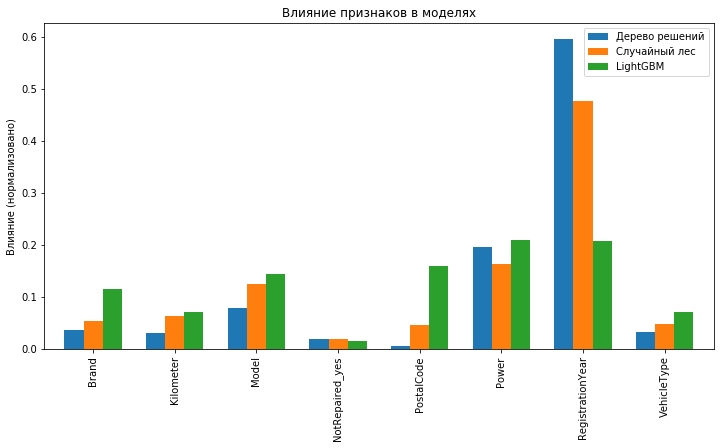

In [85]:
importances = pd.DataFrame()

for model in [best_tree, best_forest, best_lgbm]:
    importance = model.feature_importances_
    importances = importances.append (pd.Series(importance, index=features_train.columns), ignore_index=True)

# Нормализуем показатели, сведя их к одному масштабу:
importances = importances.div (importances.sum (axis=1), axis=0)
importances.T.plot(kind='bar', figsize=(12,6), width=0.7).set(title="Влияние признаков в моделях", ylabel="Влияние (нормализовано)");
plt.legend(['Дерево решений', 'Случайный лес', 'LightGBM']);

Успешные модели довольно похожи: градиентный бустинг меньше опирается на год регистрации, уделяя больше внимания модели и региону. Мощность играет близкую роль у всех видов моделей, а состояние машины имеет наименьший "вес" среди значимых признаков.

## Вывод

Мы изучили и предобработали данные и испытали несколько моделей регрессии (линейную регрессию, дерево решений, случайный лес и модуль градиентного бустинга LightGBM).

По итогам аналитической части можно сделать следующие выводы:

- Разброс цен в исходном датасете составляет 0 до 20000 евро, медианное значение 2700 евро. Мы ограничили цены диапазоном 142 - 9800 евро, этот параметр в идеале подлежит дальнейшему согласованию с заказчиком.
- Период 2016-2019 в значениях года регистрации не соответствует техническим временным отметкам `DateCrawled` и противоречит ценовой динамике предыдущих лет, поэтому мы исключили данные за этот период из выборки (как и последующие явно некорректные значения). За минимальную дату был принят 1931 год. Признак месяца регистрации содержит аномальные значения 0, сильно отличающиеся от остальных месяцев по цене. Эти строки также были удалены.
- Цена на автомобили последних лет ожидаемо падает с их возрастом, а также обратно пропорциональна пробегу, за исключением машин с наименьшим пробегом. Причина последнего не вполне ясна, но может иметь реальные основания, поэтому эти данные были сохранены.
- Значения мощности двигателя разбросаны очень сильно и содержат большое количество нулей. Ввиду различия значений даже в пределах одной модели нам пришлось удалить нулевые строки. Допустимый диапазон значений мы ограничили 1-310 л.с. Цена достаточно явно зависит от значений мощности.

По итогам обучения и тестирования моделей машинного обучения:

- Поскольку техзадание ставит ограничения на ресурсоемкость модели, мы не стали задавать слишком сложные гиперпараметры, ограничившись 25 деревьями для случайного леса и 300 для градиентного бустинга. Обучение модели линейной регрессии идет около 100 мс, дерева решений - порядка 0,6 с, cлучайного леса -  около 5 с. Градиентный бустинг учится медленнее всех - около 10 с.
- Прохождение тестовой выборки по большей части быстрее: дерево решений требует всего 30 мс, линейная регрессия - 200 мс (больше, чем обучение), случайный лес порядка 300-350 мс, градиентный бустинг - более 700 мс.
- Точность линейной регрессии оставляет желать лучшего - RMSE превышает 1600 евро. Дерево смотрится заметно лучше - среднеквадартичная ошибка 1100 евро (0.8 метрики R2). Градиентный бустинг и случайный лес впереди всех с 0,83-0,84 R2 и RMSE порядка 1000.

В целом можно заключить:
- Модель линейной регрессии не обеспечивает должной точности.
- Из успешных моделей решаюшее дерево вне конкуренции по скорости и обеспечивает приемлемую точность (тем более, что конечное приложение наверняка будет округлять результат);
- Модели случайного леса и LightGBM сопоставимы по точности и скорости; кроме того, они хорошо распараллеливаются, в отличие от дерева. В условиях многоядерной или многопроцессорной системы они приближаются к дереву по фактической скорости работы и имеют запас по увеличению точности за счет увеличения числа итераций.
- В целом ошибка в пределах 1000 евро (меньше в абсолюте, поскольку на среднеквадратичную ошибку сильно влияет качество данных) - удовлетворительный результат. Усложняя модели, можно улучшить метрику еще на несколько процентов.

### Рекомендации по заполению данных

Данные сильно зашумлены - возможно, ошибки webscraping'а, а может и плохая фильтрация ввода анкет. Есть сильное подозрение, что многие цифры попали не в те столбцы, в какие должны были - даты и значения мощности как наиболее очевидные примеры. Целевая метрика MSE/RMSE чувствительна к выбросам - более аккуратное составление выборки благотворно скажется на результате.

Отдельный вопрос встает с ценами на позиции с наименьшим пробегом - ошибка или объективные причины?